<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/EDA_Lab_3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise 3

Use the VGChartz video game sales dataset available from
https://www.kaggle.com/datasets/gregorut/videogamesales

1.   Import pandas and matplotlib.pyplot.
2.   Load the VGChartz video game sales data into a DataFrame.
3. Create a pie chart to visualize the distribution of video games across different
genres (e.g., Action, Adventure, Role-Playing).
4. Create a bar chart to compare the average sales of video games across different
platforms (e.g., Playstation, Xbox, PC).
5. Create a lollipop chart to visualize the top 10 best-selling video games, with the
lollipop stick representing the sales value and the circle representing the game
title.

1. Data Preparation and Overview
- Import the necessary libraries: pandas and matplotlib.pyplot.
- Load the dataset into a Pandas DataFrame and display the first few rows to understand the structure of the data.
- Check for missing values and handle them appropriately.
- Display the summary statistics of numerical columns (e.g., sales data).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the VGChartz video game sales data into a DataFrame
df = pd.read_csv('vgsales.csv')  # Replace 'path/to/vgsales.csv' with the actual file path


2. Genre Analysis
- Visualize the distribution of video games across different genres using a pie chart.
- Pie Chart (Genre Distribution):

  - Question 1: Which genre has the highest percentage of games?
  - Question 2: Which genre has the lowest percentage of games?
  - Question 3: What are the top 3 most popular genres?
  - Question 4: Are there any genres that have a very small representation?

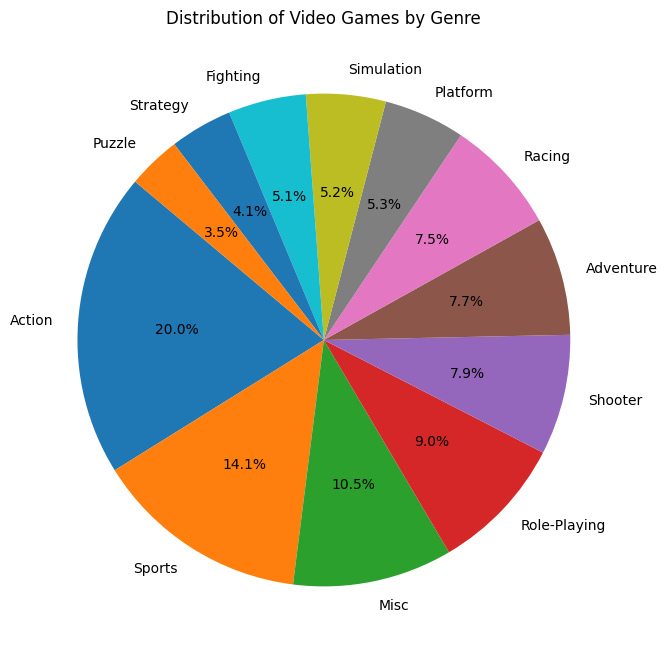

In [3]:
# Group by genre and count the number of games in each
genre_distribution = df['Genre'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Video Games by Genre')
plt.show()

3. Platform Analysis
- Bar Chart (Average Sales by Platform):

  - Question 1: Which platform has the highest average global sales?
  - Question 2: Which platform has the lowest average global sales?
  - Question 3: What is the approximate average global sales for a specific platform (e.g., PlayStation 3)?
  - Question 4: Are there any platforms with significantly higher or lower average sales compared to others?


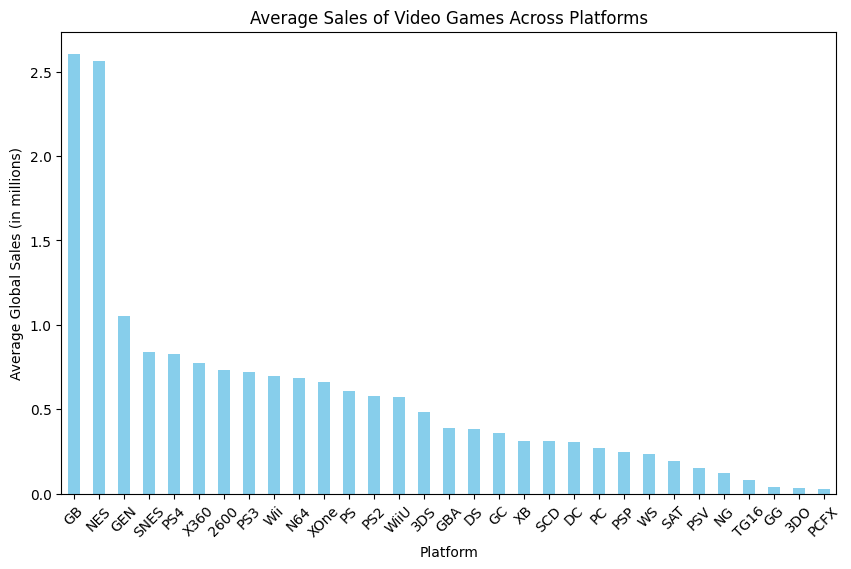

In [4]:
# Group by platform and calculate the average sales
average_sales = df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales (in millions)')
plt.title('Average Sales of Video Games Across Platforms')
plt.xticks(rotation=45)
plt.show()

4. Top Video Games Analysis
- Lollipop Chart (Top 10 Best-Selling Games):

  - Question 1: What is the name of the best-selling game?
  - Question 2: What are the global sales figures for a specific game in the top 10?
  - Question 3: How much higher are the sales of the top game compared to the 10th best-selling game?
  - Question 4: Can you list the top 3 best selling games and their sales numbers?

Top 10 Best-Selling Video Games:
                        Name Platform         Genre  Global_Sales
0                 Wii Sports      Wii        Sports         82.74
1          Super Mario Bros.      NES      Platform         40.24
2             Mario Kart Wii      Wii        Racing         35.82
3          Wii Sports Resort      Wii        Sports         33.00
4   Pokemon Red/Pokemon Blue       GB  Role-Playing         31.37
5                     Tetris       GB        Puzzle         30.26
6      New Super Mario Bros.       DS      Platform         30.01
7                   Wii Play      Wii          Misc         29.02
8  New Super Mario Bros. Wii      Wii      Platform         28.62
9                  Duck Hunt      NES       Shooter         28.31


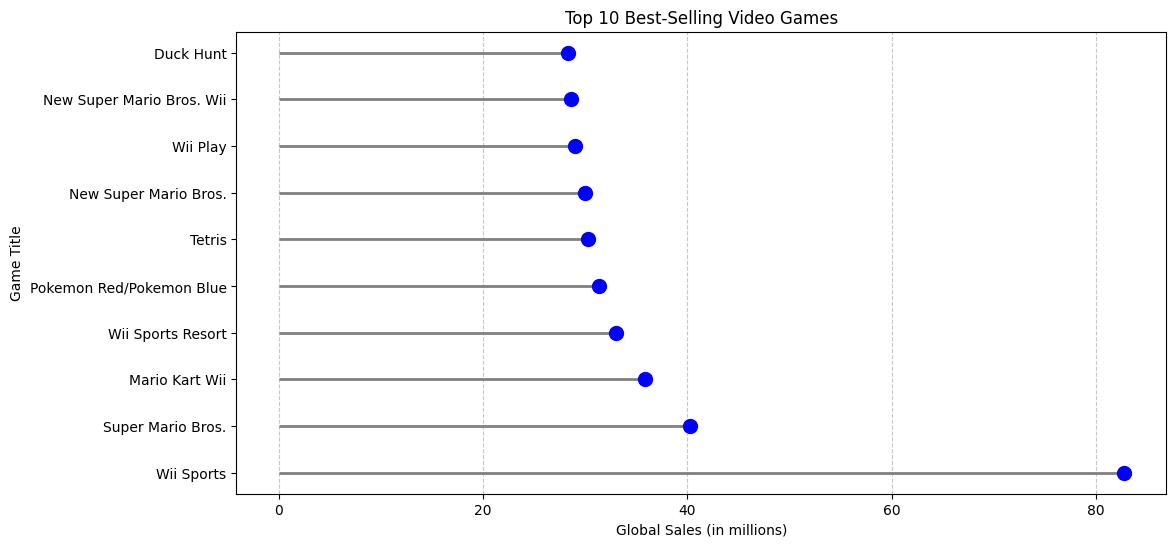

In [8]:
# Get the top 10 best-selling video games
top_10_games = df.nlargest(10, 'Global_Sales')
print("Top 10 Best-Selling Video Games:")
print(top_10_games[['Name', 'Platform', 'Genre', 'Global_Sales']])

# Plot the lollipop chart
plt.figure(figsize=(12, 6))
plt.hlines(y=top_10_games['Name'], xmin=0, xmax=top_10_games['Global_Sales'], color='gray', linewidth=2)
plt.plot(top_10_games['Global_Sales'], top_10_games['Name'], 'o', markersize=10, color='blue')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.title('Top 10 Best-Selling Video Games')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Additional Analysis:
5. Regional Sales Analysis
- Analyze the regional sales (NA_Sales, EU_Sales, JP_Sales) and identify which region has the highest sales overall.
- Create a grouped bar chart to compare regional sales for the top 5 platforms.

Region with the highest sales overall: NA_Sales (4392.950000000001 million units)


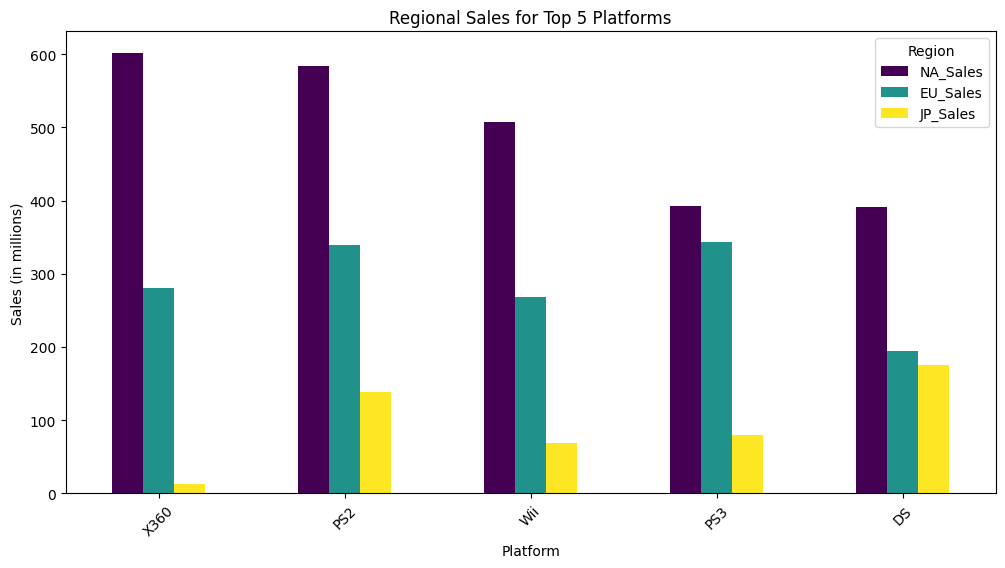

In [ ]:
# Regional Sales Analysis
# a. Analyze which region has the highest sales overall
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
highest_sales_region = regional_sales.idxmax()
print(f"Region with the highest sales overall: {highest_sales_region} ({regional_sales[highest_sales_region]} million units)")

# b. Grouped Bar Chart: Compare regional sales for the top 5 platforms
top_5_platforms = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().nlargest(5, 'NA_Sales')

# Plot the grouped bar chart
top_5_platforms.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Regional Sales for Top 5 Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()